<a href="https://colab.research.google.com/github/polock11/nlp_fall_2023/blob/main/NLP_LAB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>A - Data processing and basic text handeling </h1>

In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk.tag.tnt import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

<h1>Problem : 1</h1>

In [ ]:
words = brown.words()

freqs = FreqDist(brown.words())

output_file_path = "brown_corpus_word_frequencies.txt"

# Open the file for writing
with open(output_file_path, "w") as output_file:
    # Iterate through word frequencies and write them to the file
    for word, freq in freqs.items():
        output_file.write(f"{word}: {freq}\n")

<h1>Problem : 2</h1>

In [ ]:
df = pd.DataFrame(freqs.items(), columns=['word', 'frequency'])
df

,word,frequency
0,The,7258
1,Fulton,17
2,County,85
3,Grand,18
4,Jury,4
...,...,...
56052,aviary,1
56053,olive-flushed,1
56054,coral-colored,1
56055,boucle,1


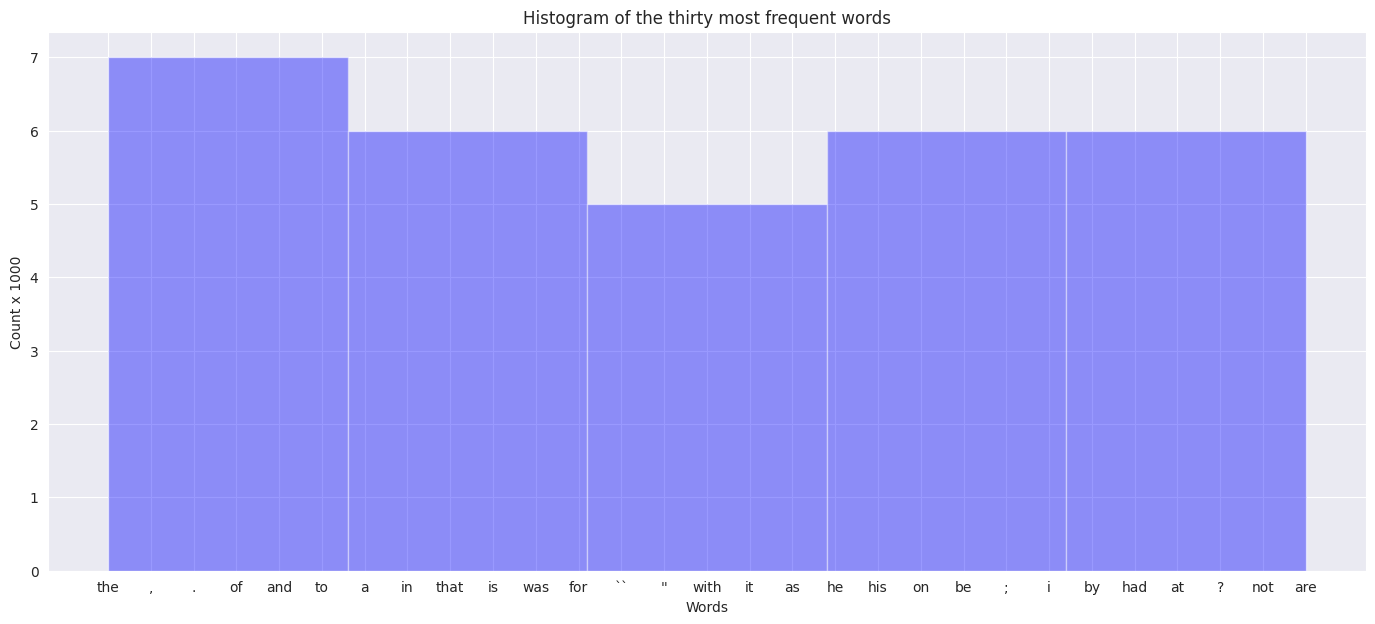

In [ ]:
df['word'] = df['word'].str.lower()
df.sort_values(by ='frequency', ascending=False, inplace=True)
df_desc = df.head(30)

column_data = df_desc['word']

plt.figure(figsize = (17,7))
sns.set_style('darkgrid')

# Create a histogram
plt.hist(column_data, bins=5, color='blue', alpha=0.4)
plt.xlabel('Words')
plt.ylabel('Count x 1000')
plt.title('Histogram of the thirty most frequent words')

plt.show()

<h1>Problem : 3</h1>


In [ ]:
df.sort_values(by ='frequency', inplace=True)
df_asc = df.head(30)

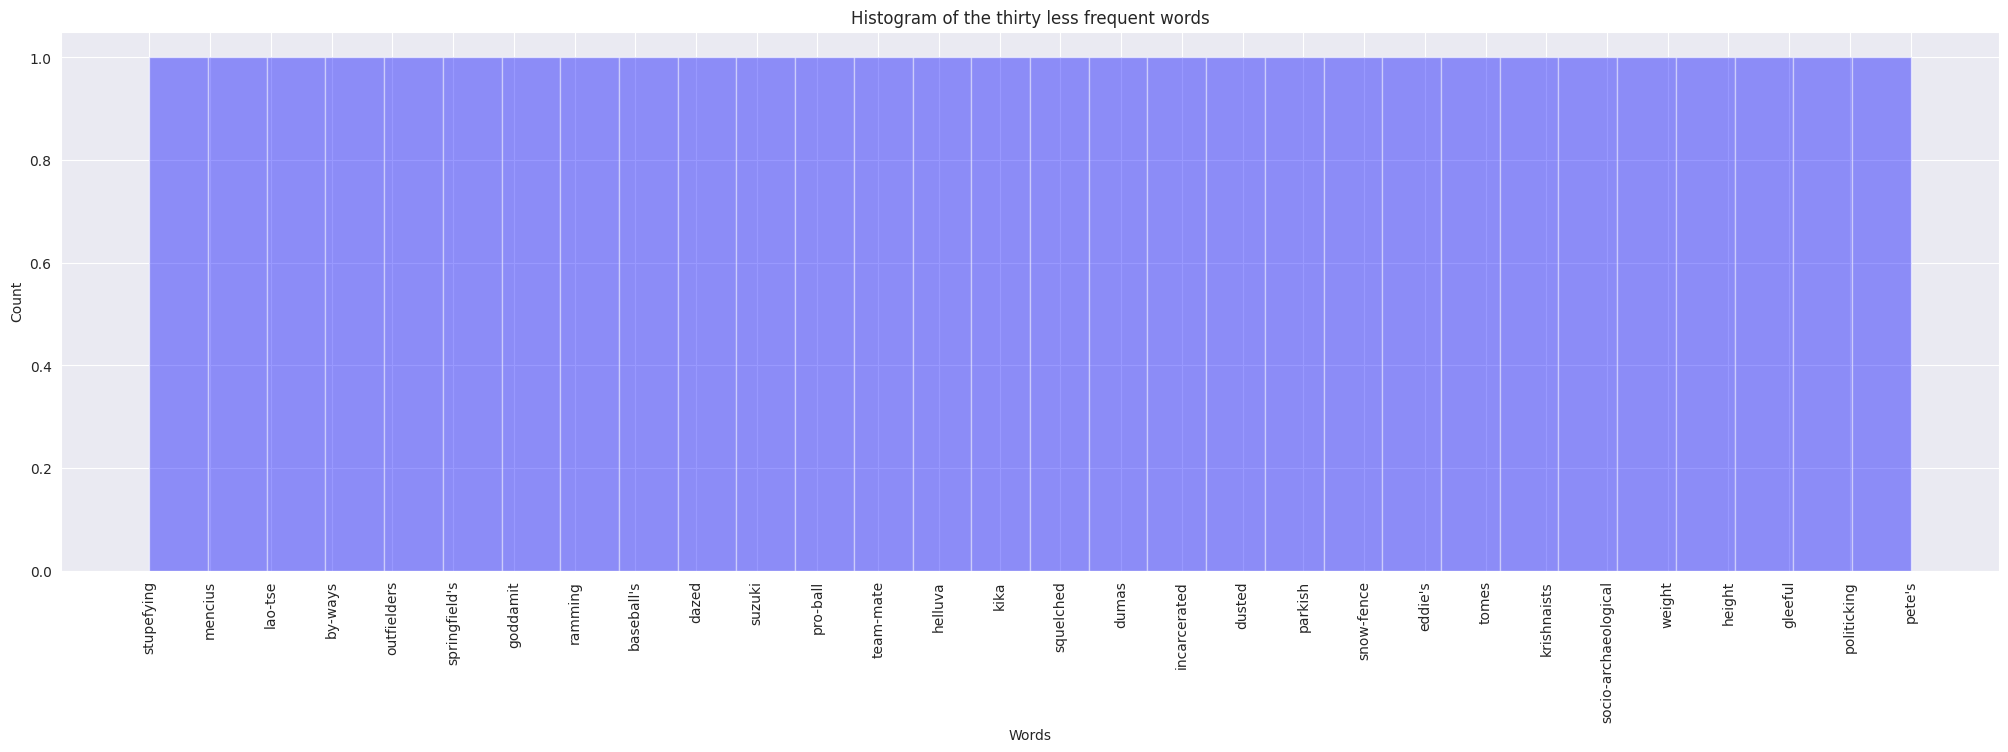

In [ ]:
cd = df_asc['word']

plt.figure(figsize = (25,7))
sns.set_style('darkgrid')

# Create a histogram
plt.hist(cd, bins=30, color='blue', alpha=0.4)
plt.xlabel('Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Histogram of the thirty less frequent words')

plt.show()

In [ ]:
'''
    for this problem i took the median of the frequencies and then selected 15
    data point forward and backward of the datapoint
'''


import math
df.sort_values(by='frequency', inplace=True)
df.reset_index(drop=True, inplace=True)
median = math.ceil(56057/2)
median

28029

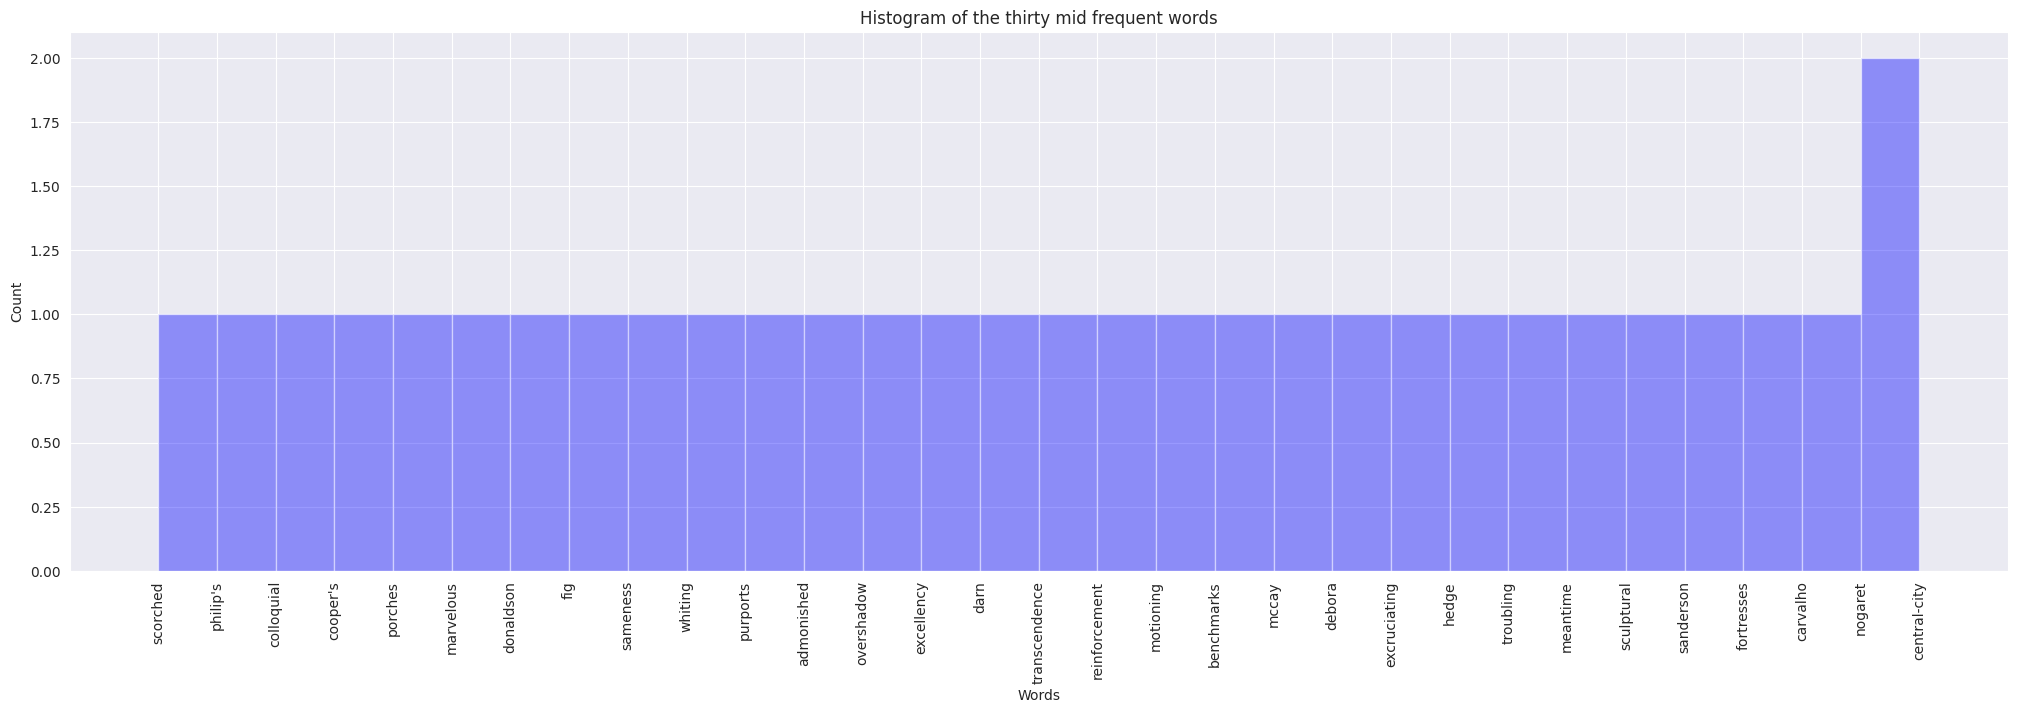

In [ ]:
mid_freq_words = df.loc[28013:28043]

data = mid_freq_words['word']

plt.figure(figsize = (25,7))
sns.set_style('darkgrid')

# Create a histogram
plt.hist(data, bins=30, color='blue', alpha=0.4)
plt.xlabel('Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Histogram of the thirty mid frequent words')

plt.show()

<h1>Problem 04:</h2>

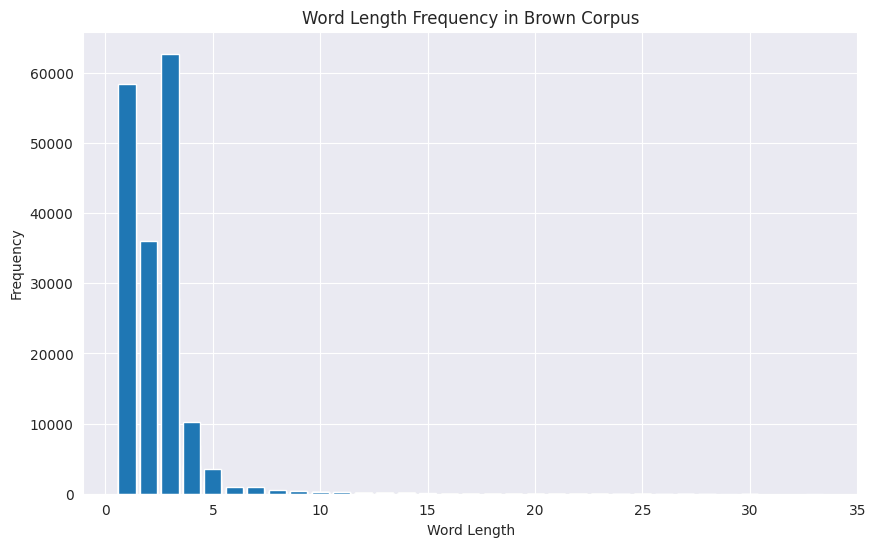

In [ ]:
df['word_len'] = df['word'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
plt.bar(df['word_len'], df['frequency'])
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Frequency in Brown Corpus')
plt.show()

<h1>Problem 5: <h2>

In [ ]:
text = brown.words()
fdist = nltk.FreqDist(w.lower() for w in text)
modals = ['will', 'must', 'might', 'may', 'could', 'can']
for m in modals:
    print(m + ':', fdist[m], end=' ')

will: 2245 must: 1013 might: 672 may: 1402 could: 1601 can: 1772 

In [ ]:
modal_words = ["will", "must", "might", "may", "could", "can"]

sents = list(brown.sents())

for sent in sents:
    for word in sent:
        if word.lower() in modal_words:
            st = " ".join(sent)
            cst = ''.join(st)
            word_len = len(sent)
            char_len = len(cst)
            print("Sentence: " + st)
            print("Word Length: " + str(word_len)+ " Char Length: " + str(char_len))

<h1>Problem 6:<h2>

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
sents = list(brown.sents(categories = 'news'))

sw_count = 0

sw_freq = []
word_length = []
char_length = []

for sent in sents:
    sw_count = 0
    st = " ".join(sent)
    cst = ''.join(st)
    word_len = len(sent)
    char_len = len(cst)

    for word in sent:
        if word in stop_words:
            sw_count += 1

    sw_freq.append(sw_count)
    word_length.append(word_len)
    char_length.append(char_len)

result_dict = {
    "sw_count": sw_freq,
    "word_len": word_length,
    "char_len": char_length
}

print(result_dict)



{'sw_count': [5, 19, 11, 14, 8, 10, 16, 0, 9, 6, 4, 4, 10, 6, 24, 7, 9, 7, 16, 0, 10, 12, 10, 16, 0, 3, 11, 0, 9, 9, 4, 0, 1, 5, 6, 5, 5, 10, 2, 5, 5, 4, 1, 12, 6, 4, 13, 13, 8, 13, 11, 12, 8, 2, 4, 10, 5, 11, 13, 7, 6, 0, 9, 19, 9, 0, 12, 13, 8, 11, 17, 10, 5, 10, 7, 8, 12, 16, 6, 5, 12, 0, 10, 7, 2, 6, 2, 6, 9, 5, 4, 9, 3, 7, 12, 2, 1, 3, 0, 3, 15, 4, 8, 10, 11, 9, 8, 7, 12, 7, 3, 13, 7, 5, 8, 0, 10, 10, 8, 18, 16, 11, 5, 11, 3, 8, 4, 7, 7, 7, 7, 1, 2, 8, 11, 13, 1, 12, 9, 6, 13, 10, 11, 11, 0, 6, 12, 9, 9, 8, 8, 3, 0, 3, 14, 12, 6, 6, 10, 15, 6, 2, 2, 1, 0, 5, 9, 2, 7, 4, 12, 6, 5, 0, 6, 7, 5, 7, 4, 7, 17, 9, 0, 10, 12, 8, 6, 0, 8, 6, 11, 6, 1, 3, 11, 7, 9, 12, 6, 7, 0, 4, 5, 9, 7, 1, 11, 3, 0, 14, 17, 10, 1, 4, 17, 11, 9, 5, 3, 9, 5, 0, 16, 6, 4, 8, 5, 22, 0, 4, 13, 16, 11, 3, 0, 11, 0, 14, 12, 6, 2, 3, 13, 8, 7, 5, 15, 0, 11, 1, 6, 5, 0, 8, 13, 0, 6, 14, 0, 5, 0, 5, 6, 0, 25, 12, 4, 6, 4, 0, 2, 3, 11, 7, 8, 1, 8, 7, 8, 6, 6, 1, 7, 4, 4, 9, 3, 0, 5, 4, 7, 9, 9, 1, 3, 4, 3, 8, 4, 8,

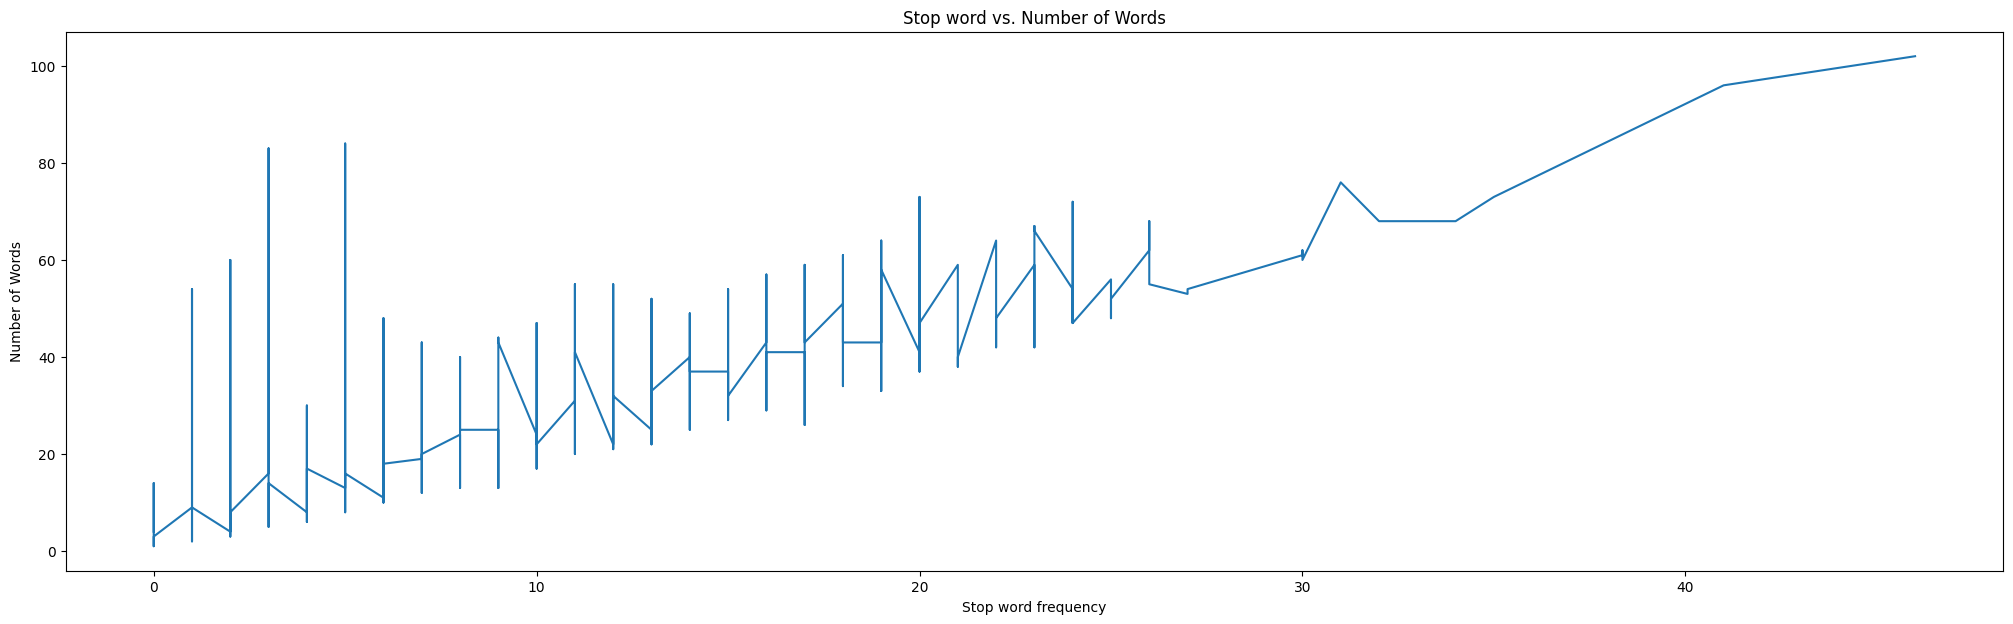

In [ ]:
df = pd.DataFrame(result_dict)
df.sort_values(by='sw_count', inplace=True)

plt.figure(figsize = (25,7))
plt.plot(df['sw_count'],df['word_len'])
plt.xlabel('Stop word frequency')
plt.ylabel('Number of Words')
plt.title('Stop word vs. Number of Words')
plt.show()

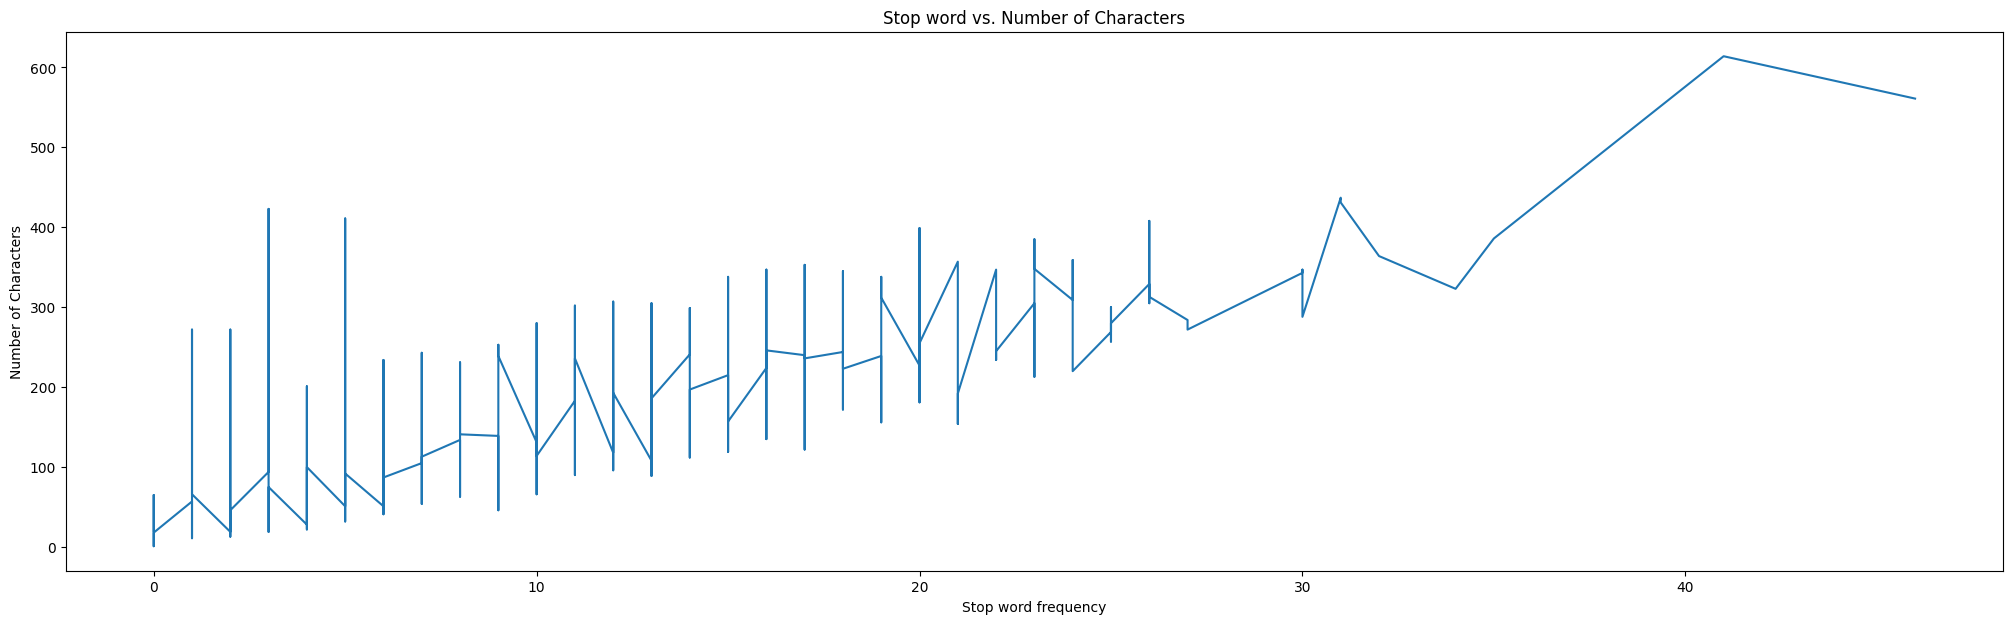

In [ ]:
df = pd.DataFrame(result_dict)
df.sort_values(by='sw_count', inplace=True)

plt.figure(figsize = (25,7))
plt.plot(df['sw_count'],df['char_len'])
plt.xlabel('Stop word frequency')
plt.ylabel('Number of Characters')
plt.title('Stop word vs. Number of Characters')
plt.show()

<h1>B- Information Retrieval 1</h1>

In [ ]:
pip install docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53894 sha256=10e949ee7e6d2666f0ef56a42c1dd8fa21136a4c1aa32e542de7c0847b1ad3d1
  Stored in directory: /root/.cache/pip/wheels/81/f5/1d/e09ba2c1907a43a4146d1189ae4733ca1a3bfe27ee39507767
Successfully built docx


In [ ]:
# Open the file
with open('Abstracts.txt', 'rb') as file:
    # Read the contents
    document_text = file.read()

document_text = document_text.decode('utf-8', 'ignore')
abstracts = document_text.replace('\r', '').replace('\n', '')
abstracts = abstracts.replace('\ufeff','')

abstracts

'Title: Adaptive User-centered Neuro-symbolic Learning for Multimodal Interaction with Autonomous Systems.Abstract: Recent advances in machine learning, particularly deep learning, have enabled autonomous systems to perceive and comprehend objects and their environments in a perceptual subsymbolic manner. These systems can now perform object detection, sensor data fusion, and language understanding tasks. However, there is a growing need to enhance these systems to understand objects and their environments more conceptually and symbolically. It is essential to consider both the explicit teaching provided by humans (e.g., describing a situation or explaining how to act) and the implicit teaching obtained by observing human behavior (e.g., through the system’s sensors) to achieve this level of powerful artificial intelligence. Thus, the system must be designed with multimodal input and output capabilities to support implicit and explicit interaction models. In this position paper, we arg

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

tokens = word_tokenize(abstracts)

q1 = ["machine learning", "multimodal input", "artificial intelligence", "computer vision", "natural language processing"]
q2 = ['Large Language Model', 'Multi-Modal Learning', 'Instruction Tuning']



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


list

In [ ]:
import tarfile

with tarfile.open('tolldata.tgz', 'r:gz') as tar_ref:
    tar_ref.extractall('unzipd_data')


In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}

df = pd.DataFrame(data)

# Use iloc to select a specific column
column_index = 1  # For example, selecting the second column (index 1)

selected_column = df.iloc[:, column_index]

print(selected_column)

0    4
1    5
2    6
Name: B, dtype: int64


In [ ]:
df = pd.read_csv('data.csv', header = None)
df


,0,1,2,3,4,5
0,1,Thu Aug 19 21:54:38 2021,125094,car,2,VC965
1,2,Sat Jul 31 04:09:44 2021,174434,car,2,VC965
2,3,Sat Aug 14 17:19:04 2021,8538286,car,2,VC965
3,4,Mon Aug 2 18:23:45 2021,5521221,car,2,VC965
4,5,Thu Jul 29 22:44:20 2021,3267767,car,2,VC965
5,6,Sat Aug 14 03:57:47 2021,8411850,car,2,VC965
6,7,Thu Aug 12 03:41:22 2021,6064250,car,2,VC965
7,8,Sun Aug 22 10:29:58 2021,6871937,van,2,VCD2F
8,9,Fri Aug 6 14:23:08 2021,2055930,car,2,VC965
9,10,Sun Aug 15 13:43:51 2021,8775910,car,2,VC965


In [ ]:
df = df[[0,1,2]]
df.to_csv('name.csv',index=False)